In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['RestingECG','ChestPainType','ST_Slope'])

In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,F,160,180,0,156,N,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,M,130,283,0,98,N,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,F,138,214,0,108,Y,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,M,150,195,0,122,N,0.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
for binfeat in ['Sex','ExerciseAngina']:        
    df[binfeat] = LabelEncoder().fit_transform(df[binfeat])

In [ ]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
X = df.drop(columns='HeartDisease')
Y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=48, stratify=Y)

全てのデータ（説明変数１８個）での検証

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[71, 11],
       [ 8, 94]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8967391304347826

全てのデータ（説明変数１８個）での検証  
決定木

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf2=DecisionTreeClassifier()
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[68, 14],
       [13, 89]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8532608695652174

In [ ]:
import graphviz
from sklearn import tree
from sklearn.tree import plot_tree
#from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

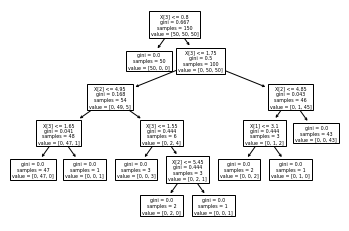

In [ ]:
tree.plot_tree(clf)

[Text(170.83636363636364, 211.04470588235293, 'X[17] <= 0.5\ngini = 0.494\nsamples = 734\nvalue = [328, 406]'),
 Text(87.62727272727273, 198.25411764705882, 'X[1] <= 0.5\ngini = 0.296\nsamples = 426\nvalue = [77, 349]'),
 Text(33.38181818181818, 185.4635294117647, 'X[11] <= 0.5\ngini = 0.5\nsamples = 67\nvalue = [33, 34]'),
 Text(15.709090909090909, 172.6729411764706, 'X[3] <= 235.5\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(7.8545454545454545, 159.88235294117646, 'X[2] <= 155.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(3.9272727272727272, 147.09176470588235, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(11.781818181818181, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.563636363636363, 159.88235294117646, 'X[7] <= 1.25\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(19.636363636363637, 147.09176470588235, 'X[0] <= 64.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(15.709090909090909, 134.30117647058825, 'X[14] <= 0.5\ng

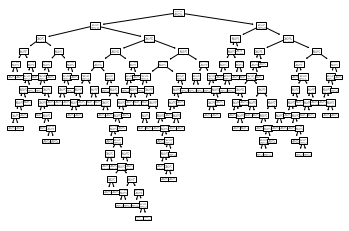

In [ ]:
tree.plot_tree(clf2)

In [ ]:
!pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4 MB 5.2 kB/s 
     |████████████████████████████████| 4.0 MB 45.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
# 乱数のシードを設定
import random
import numpy as np

np.random.seed(1234)
random.seed(1234)

# 使用するパッケージ（ライブラリと関数）を定義
# 標準正規分布の生成用
from numpy.random import *

# グラフの描画用
import matplotlib.pyplot as plt

# その他
import pandas as pd

# シグモイド関数をimport
from scipy.special import expit

In [ ]:
!pip install cdt==0.5.18

     |████████████████████████████████| 917 kB 2.8 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=99f99200352f9cb5fea2434d9d1446c67e4bd4f2a0121deb996b356abaf4abed
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=5fda428efe2f0b214a4d5c5bcc0e67490479645e5204dbe521204eb50f13c15e
  Stored in directory: /root/.cache/pip/wheels/4f/3b/07/22a9a01f3f25cd376122b5ef526737a44993b4c312e50916ed
Successfully built GPUtil skrebate


In [ ]:
# PyTorchから使用するものをimport
import torch
import torch.nn as nn


class SAMDiscriminator(nn.Module):
    """SAMのDiscriminatorのニューラルネットワーク
    """

    def __init__(self, nfeatures, dnh, hlayers):
        super(SAMDiscriminator, self).__init__()

        # ----------------------------------
        # ネットワークの用意
        # ----------------------------------
        self.nfeatures = nfeatures  # 入力変数の数

        layers = []
        layers.append(nn.Linear(nfeatures, dnh))
        layers.append(nn.BatchNorm1d(dnh))
        layers.append(nn.LeakyReLU(.2))

        for i in range(hlayers-1):
            layers.append(nn.Linear(dnh, dnh))
            layers.append(nn.BatchNorm1d(dnh))
            layers.append(nn.LeakyReLU(.2))

        layers.append(nn.Linear(dnh, 1))  # 最終出力

        self.layers = nn.Sequential(*layers)

        # ----------------------------------
        # maskの用意（対角成分のみ1で、他は0の行列）
        # ----------------------------------
        mask = torch.eye(nfeatures, nfeatures)  # 変数の数×変数の数の単位行列
        self.register_buffer("mask", mask.unsqueeze(0))  # 単位行列maskを保存しておく

        # 注意：register_bufferはmodelのパラメータではないが、その後forwardで使う変数を登録するPyTorchのメソッドです
        # self.変数名で、以降も使用可能になります
        # https://pytorch.org/docs/stable/nn.html?highlight=register_buffer#torch.nn.Module.register_buffer

    def forward(self, input, obs_data=None):
        """　順伝搬の計算
        Args:
            input (torch.Size([データ数, 観測変数の種類数])): 観測したデータ、もしくは生成されたデータ
            obs_data (torch.Size([データ数, 観測変数の種類数])):観測したデータ
        Returns:
            torch.Tensor: 観測したデータか、それとも生成されたデータかの判定結果
        """

        if obs_data is not None:
          # 生成データを識別器に入力する場合
            return [self.layers(i) for i in torch.unbind(obs_data.unsqueeze(1) * (1 - self.mask)
                                                         + input.unsqueeze(1) * self.mask, 1)]
            # 対角成分のみ生成したデータ、その他は観測データに
            # データを各変数ごとに、生成したもの、その他観測したもので混ぜて、1変数ずつ生成したものを放り込む
            # torch.unbind(x,1)はxの1次元目でテンソルをタプルに展開する
            # minibatch数が2000、観測データの変数が6種類の場合、
            # [2000,6]→[2000,6,6]→([2000,6], [2000,6], [2000,6], [2000,6], [2000,6], [2000,6])→([2000,1], [2000,1], [2000,1], [2000,1], [2000,1], [2000,1])
            # returnは[torch.Size([2000, 1]),torch.Size([2000, 1]),torch.Size([2000, 1], torch.Size([2000, 1]),torch.Size([2000, 1]),torch.Size([2000, 1])]

            # 注：生成した変数全種類を用いた判定はしない。
            # すなわち、生成した変数1種類と、元の観測データたちをまとめて1つにし、それが観測結果か、生成結果を判定させる

        else:
            # 観測データを識別器に入力する場合

            return self.layers(input)
            # returnは[torch.Size([2000, 1])]


    def reset_parameters(self):
        """識別器Dの重みパラメータの初期化を実施"""
        for layer in self.layers:
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

In [ ]:
from cdt.utils.torch import ChannelBatchNorm1d, MatrixSampler, Linear3D


class SAMGenerator(nn.Module):
    """SAMのGeneratorのニューラルネットワーク
    """

    def __init__(self, data_shape, nh):
        """初期化"""
        super(SAMGenerator, self).__init__()

        # ----------------------------------
        # 対角成分のみ0で、残りは1のmaskとなる変数skeletonを作成
        # ※最後の行は、全部1です
        # ----------------------------------
        nb_vars = data_shape[1]  # 変数の数
        skeleton = 1 - torch.eye(nb_vars + 1, nb_vars)

        self.register_buffer('skeleton', skeleton)

        # 注意：register_bufferはmodelのパラメータではないが、その後forwardで使う変数を登録するPyTorchのメソッドです
        # self.変数名で、以降も使用可能になります
        # https://pytorch.org/docs/stable/nn.html?highlight=register_buffer#torch.nn.Module.register_buffer

        # ----------------------------------
        # ネットワークの用意
        # ----------------------------------
        # 入力層（SAMの形での全結合層）　
        self.input_layer = Linear3D(
            (nb_vars, nb_vars + 1, nh))  # nhは中間層のニューロン数
        # https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/32200779ab9b63762be3a24a2147cff09ba2bb72/cdt/utils/torch.py#L289

        # 中間層
        layers = []
        # 2次元を1次元に変換してバッチノーマライゼーションするモジュール
        layers.append(ChannelBatchNorm1d(nb_vars, nh))
        layers.append(nn.Tanh())
        self.layers = nn.Sequential(*layers)

        # ChannelBatchNorm1d
        # https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/32200779ab9b63762be3a24a2147cff09ba2bb72/cdt/utils/torch.py#L130

        # 出力層（再度、SAMの形での全結合層）
        self.output_layer = Linear3D((nb_vars, nh, 1))

    def forward(self, data, noise, adj_matrix, drawn_neurons=None):
        """　順伝搬の計算
        Args:
            data (torch.Tensor): 観測データ
            noise (torch.Tensor): データ生成用のノイズ
            adj_matrix (torch.Tensor): 因果関係を示す因果構造マトリクスM
            drawn_neurons (torch.Tensor): Linear3Dの複雑さを制御する複雑さマトリクスZ
        Returns:
            torch.Tensor: 生成されたデータ
        """

        # 入力層
        x = self.input_layer(data, noise, adj_matrix *
                             self.skeleton)  # Linear3D

        # 中間層（バッチノーマライゼーションとTanh）
        x = self.layers(x)

        # 出力層
        output = self.output_layer(
            x, noise=None, adj_matrix=drawn_neurons)  # Linear3D

        return output.squeeze(2)

    def reset_parameters(self):
        """重みパラメータの初期化を実施"""

        self.input_layer.reset_parameters()
        self.output_layer.reset_parameters()

        for layer in self.layers:
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

Detecting 1 CUDA device(s).


In [ ]:
# ネットワークを示す因果構造マトリクスMがDAG（有向非循環グラフ）になるように加える損失

def notears_constr(adj_m, max_pow=None):
    """No Tears constraint for binary adjacency matrixes. 
    Args:
        adj_m (array-like): Adjacency matrix of the graph
        max_pow (int): maximum value to which the infinite sum is to be computed.
           defaults to the shape of the adjacency_matrix
    Returns:
        np.ndarray or torch.Tensor: Scalar value of the loss with the type
            depending on the input.
    参考：https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/32200779ab9b63762be3a24a2147cff09ba2bb72/cdt/utils/loss.py#L215
    """
    m_exp = [adj_m]
    if max_pow is None:
        max_pow = adj_m.shape[1]
    while(m_exp[-1].sum() > 0 and len(m_exp) < max_pow):
        m_exp.append(m_exp[-1] @ adj_m/len(m_exp))

    return sum([i.diag().sum() for idx, i in enumerate(m_exp)])

In [ ]:
from sklearn.preprocessing import scale
from torch import optim
from torch.utils.data import DataLoader
from tqdm import tqdm


def run_SAM(in_data, lr_gen, lr_disc, lambda1, lambda2, hlayers, nh, dnh, train_epochs, test_epochs, device):
    '''SAMの学習を実行する関数'''

    # ---------------------------------------------------
    # 入力データの前処理
    # ---------------------------------------------------
    list_nodes = list(in_data.columns)  # 入力データの列名のリスト
    data = scale(in_data[list_nodes].values)  # 入力データの正規化
    nb_var = len(list_nodes)  # 入力データの数 = d
    data = data.astype('float32')  # 入力データをfloat32型に
    data = torch.from_numpy(data).to(device)  # 入力データをPyTorchのテンソルに
    rows, cols = data.size()  # rowsはデータ数、colsは変数の数

    # ---------------------------------------------------
    # DataLoaderの作成（バッチサイズは全データ）
    # ---------------------------------------------------
    batch_size = rows  # 入力データ全てを使用したミニバッチ学習とする
    data_iterator = DataLoader(data, batch_size=batch_size,
                               shuffle=True, drop_last=True)
    # 注意：引数のdrop_lastはdataをbatch_sizeで取り出していったときに最後に余ったものは使用しない設定

    # ---------------------------------------------------
    # 【Generator】ネットワークの生成とパラメータの初期化
    # cols：入力変数の数、nhは中間ニューロンの数、hlayersは中間層の数
    # neuron_samplerは、Functional gatesの変数zを学習するネットワーク
    # graph_samplerは、Structual gatesの変数aを学習するネットワーク
    # ---------------------------------------------------
    sam = SAMGenerator((batch_size, cols), nh).to(device)  # 生成器G
    graph_sampler = MatrixSampler(nb_var, mask=None, gumbel=False).to(
        device)  # 因果構造マトリクスMを作るネットワーク
    neuron_sampler = MatrixSampler((nh, nb_var), mask=False, gumbel=True).to(
        device)  # 複雑さマトリクスZを作るネットワーク

    # 注意：MatrixSamplerはGumbel-Softmaxを使用し、0か1を出力させるニューラルネットワーク
    # SAMの著者らの実装モジュール、MatrixSamplerを使用
    # https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/32200779ab9b63762be3a24a2147cff09ba2bb72/cdt/utils/torch.py#L212

    # 重みパラメータの初期化
    sam.reset_parameters()
    graph_sampler.weights.data.fill_(2)

    # ---------------------------------------------------
    # 【Discriminator】ネットワークの生成とパラメータの初期化
    # cols：入力変数の数、dnhは中間ニューロンの数、hlayersは中間層の数。
    # ---------------------------------------------------
    discriminator = SAMDiscriminator(cols, dnh, hlayers).to(device)
    discriminator.reset_parameters()  # 重みパラメータの初期化

    # ---------------------------------------------------
    # 最適化の設定
    # ---------------------------------------------------
    # 生成器

    g_optimizer = optim.Adam(sam.parameters(), lr=lr_gen)
    graph_optimizer = optim.Adam(graph_sampler.parameters(), lr=lr_gen)
    neuron_optimizer = optim.Adam(neuron_sampler.parameters(), lr=lr_gen)

    # 識別器
    d_optimizer = optim.Adam(discriminator.parameters(), lr=lr_disc)

    # 損失関数
    criterion = nn.BCEWithLogitsLoss()
    # nn.BCEWithLogitsLoss()は、binary cross entropy with Logistic function
    # https://pytorch.org/docs/stable/nn.html#bcewithlogitsloss

    # 損失関数のDAGに関する制約の設定パラメータ
    dagstart = 0.5
    dagpenalization_increase = 0.001*10

    # ---------------------------------------------------
    # forward計算、および損失関数の計算に使用する変数を用意
    # ---------------------------------------------------
    _true = torch.ones(1).to(device)
    _false = torch.zeros(1).to(device)

    noise = torch.randn(batch_size, nb_var).to(device)  # 生成器Gで使用する生成ノイズ
    noise_row = torch.ones(1, nb_var).to(device)

    output = torch.zeros(nb_var, nb_var).to(device)  # 求まった隣接行列
    output_loss = torch.zeros(1, 1).to(device)

    # ---------------------------------------------------
    # forwardの計算で、ネットワークを学習させる
    # ---------------------------------------------------
    pbar = tqdm(range(train_epochs + test_epochs),mininterval=1)  # 進捗（progressive bar）の表示

    for epoch in pbar:
        for i_batch, batch in enumerate(data_iterator):

            # 最適化を初期化
            g_optimizer.zero_grad()
            graph_optimizer.zero_grad()
            neuron_optimizer.zero_grad()
            d_optimizer.zero_grad()

            # 因果構造マトリクスM（drawn_graph）と複雑さマトリクスZ（drawn_neurons）をMatrixSamplerから取得
            drawn_graph = graph_sampler()
            drawn_neurons = neuron_sampler()
            # (drawn_graph)のサイズは、torch.Size([nb_var, nb_var])。 出力値は0か1
            # (drawn_neurons)のサイズは、torch.Size([nh, nb_var])。 出力値は0か1

            # ノイズをリセットし、生成器Gで疑似データを生成
            noise.normal_()
            generated_variables = sam(data=batch, noise=noise,
                                      adj_matrix=torch.cat(
                                          [drawn_graph, noise_row], 0),
                                      drawn_neurons=drawn_neurons)

            # 識別器Dで判定
            # 観測変数のリスト[]で、各torch.Size([data数, 1])が求まる
            disc_vars_d = discriminator(generated_variables.detach(), batch)
            # 観測変数のリスト[] で、各torch.Size([data数, 1])が求まる
            disc_vars_g = discriminator(generated_variables, batch)
            true_vars_disc = discriminator(batch)  # torch.Size([data数, 1])が求まる

            # 損失関数の計算（DCGAN）
            disc_loss = sum([criterion(gen, _false.expand_as(gen)) for gen in disc_vars_d]) / nb_var \
                + criterion(true_vars_disc, _true.expand_as(true_vars_disc))

            gen_loss = sum([criterion(gen,
                                      _true.expand_as(gen))
                            for gen in disc_vars_g])

            # 損失の計算（SAM論文のオリジナルのfgan）
            #disc_loss = sum([torch.mean(torch.exp(gen - 1)) for gen in disc_vars_d]) / nb_var - torch.mean(true_vars_disc)
            #gen_loss = -sum([torch.mean(torch.exp(gen - 1)) for gen in disc_vars_g])

            # 識別器Dのバックプロパゲーションとパラメータの更新
            if epoch < train_epochs:
                disc_loss.backward()
                d_optimizer.step()

            # 生成器のGの損失の計算の残り（マトリクスの複雑さとDAGのNO TEAR）
            struc_loss = lambda1 / batch_size*drawn_graph.sum()     # Mのloss
            func_loss = lambda2 / batch_size*drawn_neurons.sum()   # Aのloss

            regul_loss = struc_loss + func_loss

            if epoch <= train_epochs * dagstart:
                # epochが基準前のときは、DAGになるようにMへのNO TEARSの制限はかけない
                loss = gen_loss + regul_loss

            else:
                # epochが基準後のときは、DAGになるようにNO TEARSの制限をかける
                filters = graph_sampler.get_proba()  # マトリクスMの要素を取得（ただし、0,1ではなく、1の確率）
                dag_constraint = notears_constr(filters*filters)  # NO TERARの計算

                # 徐々に線形にDAGの正則を強くする
                loss = gen_loss + regul_loss + \
                    ((epoch - train_epochs * dagstart) *
                     dagpenalization_increase) * dag_constraint

            if epoch >= train_epochs:
                # testのepochの場合、結果を取得
                output.add_(filters.data)
                output_loss.add_(gen_loss.data)
            else:
                # trainのepochの場合、生成器Gのバックプロパゲーションと更新
                # retain_graph=Trueにすることで、以降3つのstep()が実行できる
                loss.backward(retain_graph=True)
                g_optimizer.step()
                graph_optimizer.step()
                neuron_optimizer.step()

            # 進捗の表示
            if epoch % 50 == 0:
                pbar.set_postfix(gen=gen_loss.item()/cols,
                                 disc=disc_loss.item(),
                                 regul_loss=regul_loss.item(),
                                 tot=loss.item())

    return output.cpu().numpy()/test_epochs, output_loss.cpu().numpy()/test_epochs/cols  # Mと損失を出力


In [ ]:
# GPUの使用確認：True or False
torch.cuda.is_available()

True

In [ ]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,1,0,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,1,0,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,1,0,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,1,0,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
# numpyの出力を小数点2桁に
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

# 因果探索の結果を格納するリスト
m_list = []
loss_list = []

for i in range(5):
    m, loss = run_SAM(in_data=df, lr_gen=0.01*0.5,
                      lr_disc=0.01*0.5*2,
                      #lambda1=0.01, lambda2=1e-05,
                      lambda1=5.0*20, lambda2=0.005*20,
                      hlayers=2,
                      nh=200, dnh=200,
                      train_epochs=10000,
                      test_epochs=1000,
                      device='cuda:0')

    print(loss)
    print(m)

    m_list.append(m)
    loss_list.append(loss)

100%|██████████| 11000/11000 [17:42<00:00, 10.35it/s, disc=0.554, gen=7.68, regul_loss=7.47, tot=154]


[[8.02]]
[[0.00 0.00 0.97 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.98 0.62 0.99 0.88 0.00 0.99 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.98 0.00 0.01 0.44 0.87 0.01 0.99 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.98 0.01 0.00 0.99 0.00 0.00 0.99 0.00 0.95 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.90 0.01 0.00 0.01 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.01 0.99 0.00 0.00 0.99 0.00 0.99 0.96 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.98 0.00 0.97 0.00 0.00 0.99 0.00 0.00 0.98 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.01 0.00 0.01 0.01 0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.97 0.00 0.00 0.99 0.81 0.96 0.00 0.98 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.

100%|██████████| 11000/11000 [17:39<00:00, 10.38it/s, disc=0.392, gen=9.74, regul_loss=5.94, tot=193]


[[9.61]]
[[0.00 0.00 0.89 0.00 0.00 0.01 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.99 0.57 0.01 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.01 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.97 0.03 0.00 0.98 0.00 0.01 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.99 0.89 0.00 0.98 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.01 0.00]
 [0.00 0.00 0.90 0.99 0.00 0.98 0.00 0.99 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.09 0.87 0.00 0.98 0.00 1.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.01 0.00]
 [0.99 0.35 0.00 0.99 0.02 0.76 0.29 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.96 0.00]
 [0.00 0.00 0.00 0.98 0.00 0.99 0.00 0.85 0.01 0.00 0.18 0.00 0.00 0.00
  0.00 0.00 0.00 0.

100%|██████████| 11000/11000 [17:42<00:00, 10.35it/s, disc=0.848, gen=6.29, regul_loss=6.51, tot=127]


[[6.54]]
[[0.00 0.00 0.92 0.00 0.00 0.99 0.00 0.01 0.44 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.01 0.00 0.00 0.98 0.00 0.98 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.96 0.00 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.95 0.00 0.00 0.00 0.01 0.78 0.01 0.99 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.95 0.24 0.00 0.99 0.00 0.00 0.00 0.99 0.99 0.00 0.00 0.00 0.00 0.00
  0.00 0.95 0.00 0.00 0.00]
 [0.01 0.96 0.86 0.99 0.00 0.00 0.95 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.98 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.98 0.00 0.91 0.98 0.00 0.98 0.97 0.00 0.95 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.93 0.00 0.97 0.00 0.00 0.00 0.00 0.99 0.01 0.00 0.00
  0.00 0.00 0.00 0.

100%|██████████| 11000/11000 [17:39<00:00, 10.38it/s, disc=0.552, gen=7.37, regul_loss=7.26, tot=150]


[[7.28]]
[[0.00 0.00 0.97 0.00 0.00 0.98 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.93 0.00 0.00 0.97 0.95 0.95 0.00 0.00 0.95 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.98 0.00 0.97 0.00 0.01 0.97 0.94 0.98 0.04 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.97 0.00 0.95 0.98 0.00 0.00 0.00 0.88 0.95 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.95 0.00 0.00 0.99 0.00 0.97 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.01]
 [0.92 0.00 0.97 0.00 0.00 1.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.01]
 [0.98 0.00 0.00 0.92 0.01 0.94 0.96 0.98 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.01]
 [0.97 0.01 0.00 0.97 0.00 0.97 0.00 0.00 0.00 0.00 0.96 1.00 0.00 0.00
  0.00 0.00 0.00 0.

100%|██████████| 11000/11000 [17:39<00:00, 10.39it/s, disc=0.49, gen=9.23, regul_loss=6.81, tot=184]

[[9.29]]
[[0.00 0.00 0.75 0.00 0.00 0.03 0.00 0.99 0.96 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.00 0.00 0.94 0.00 0.00 0.00 0.99 0.56 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.01 0.97 0.01 0.00 0.00 0.00 0.00 0.97 0.99 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.96 0.96 0.00 1.00 0.00 0.00 0.00 0.00 0.98 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.94 0.00 0.98 0.98 0.97 0.00 0.00 0.97 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.94 0.86 0.99 0.00 0.98 0.00 0.99 0.97 0.00 0.01 0.00 0.00 0.00
  0.00 0.00 0.00 0.01 0.00]
 [0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.00 0.91 0.02 0.01 0.01 0.00 0.00 0.99 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00]
 [0.97 0.00 0.00 0.99 0.00 0.96 0.00 0.88 0.00 0.00 0.01 0.83 0.00 0.00
  0.00 0.00 0.00 0.

In [ ]:
final_list=sum(m_list)/len(m_list)

In [ ]:
final_list

array([[0.00, 0.00, 0.90, 0.00, 0.00, 0.40, 0.00, 0.20, 0.28, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.19, 0.00, 0.00, 0.59, 0.43, 0.39, 0.37, 0.00, 0.59, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.01, 0.00, 0.00, 0.58, 0.00, 0.00, 0.00, 0.20, 0.11, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.20, 0.39, 0.39, 0.00, 0.01, 0.29, 0.52, 0.39, 0.60, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.97, 0.25, 0.19, 0.99, 0.00, 0.00, 0.20, 0.37, 0.77, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.19, 0.00, 0.00, 0.00],
       [0.57, 0.37, 0.37, 0.59, 0.19, 0.00, 0.19, 0.20, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.19, 0.74, 0.40, 0.00, 0.79, 0.00, 0.79, 0.59, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.60, 0.17, 0.57, 0.39, 0.00, 0.79, 0.20, 0.00, 0.39, 0.00, 0.00,
        0

In [ ]:
df.columns[]

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

因果関係がある（閾値0.6で設定)での７個の説明変数での検証

In [ ]:
X=df[['Sex','Cholesterol','FastingBS','ExerciseAngina','ChestPainType_ASY','ST_Slope_Flat','ST_Slope_Up']]

In [ ]:
X.head()

,Sex,Cholesterol,FastingBS,ExerciseAngina,ChestPainType_ASY,ST_Slope_Flat,ST_Slope_Up
0,1,289,0,0,0,0,1
1,0,180,0,0,0,1,0
2,1,283,0,0,0,0,1
3,0,214,0,1,1,1,0
4,1,195,0,0,0,0,1


In [ ]:
Y=df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8804347826086957

７個での説明変数での決定木

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf3=DecisionTreeClassifier()
clf3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7608695652173914

In [ ]:
df.corr()["HeartDisease"]

Age                  0.282039
Sex                  0.305445
RestingBP            0.107589
Cholesterol         -0.232741
FastingBS            0.267291
MaxHR               -0.400421
ExerciseAngina       0.494282
Oldpeak              0.403951
HeartDisease         1.000000
RestingECG_LVH       0.010670
RestingECG_Normal   -0.091580
RestingECG_ST        0.102527
ChestPainType_ASY    0.516716
ChestPainType_ATA   -0.401924
ChestPainType_NAP   -0.212964
ChestPainType_TA    -0.054790
ST_Slope_Down        0.122527
ST_Slope_Flat        0.554134
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [ ]:
sorted(df.corr()["HeartDisease"])

[-0.6221642083960033,
 -0.4019240529146632,
 -0.400420769463189,
 -0.23274063892701058,
 -0.2129636250394038,
 -0.0915799605134592,
 -0.054790262026913325,
 0.010670195926114907,
 0.10252722218986567,
 0.10758898037140334,
 0.12252667640649292,
 0.2672911861103008,
 0.2820385058189967,
 0.30544491596313866,
 0.403950722062885,
 0.4942819918242627,
 0.5167164574900918,
 0.5541335908840045,
 1.0]

In [ ]:
"""
因果関係ベスト７
Sex
Cholesterol
FastingBS
ExerciseAngina
ChestPainType_ASY
ST_Slope_Flat
ST_Slope_Up
"""

'\n因果関係ベスト７\nSex\nCholesterol\nFastingBS\nExerciseAngina\nChestPainType_ASY\nST_Slope_Flat\nST_Slope_Up\n'

In [ ]:
"""
相関ベスト７
MaxHR
ChestPainType_ATA 
Oldpeak 
ExerciseAngina
ChestPainType_ASY
ST_Slope_Flat
ST_Slope_Up
"""

'\n相関ベスト７\nMaxHR\nChestPainType_ATA \nOldpeak \nExerciseAngina\nChestPainType_ASY\nST_Slope_Flat\nST_Slope_Up\n'

相関が高いベスト７での検証

In [ ]:
X1=df[["MaxHR",
"ChestPainType_ATA", 
"Oldpeak",
"ExerciseAngina",
"ChestPainType_ASY",
"ST_Slope_Flat",
"ST_Slope_Up"]]

In [ ]:
X1.head()

,MaxHR,ChestPainType_ATA,Oldpeak,ExerciseAngina,ChestPainType_ASY,ST_Slope_Flat,ST_Slope_Up
0,172,1,0.0,0,0,0,1
1,156,0,1.0,0,0,1,0
2,98,1,0.0,0,0,0,1
3,108,0,1.5,1,1,1,0
4,122,0,0.0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8586956521739131

因果関係が高い７個と相関が高い７個（たぶりあり）での検証

In [ ]:
X2=df[["MaxHR",
"ChestPainType_ATA", 
"Oldpeak",
"ExerciseAngina",
"ChestPainType_ASY",
"ST_Slope_Flat",
"ST_Slope_Up",
"Sex",
"Cholesterol",
"FastingBS",]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8913043478260869

因果関係のベスト９（閾値0.4）の場合  
あまり変化はなく

In [ ]:
X4=df[['Sex','Cholesterol','FastingBS','ExerciseAngina','ChestPainType_ASY','ST_Slope_Flat','ST_Slope_Up',"Oldpeak","ChestPainType_ATA"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8858695652173914

因果関係ベスト４閾値0.7

In [ ]:
X5=df[['FastingBS','ChestPainType_ASY','ST_Slope_Flat','ST_Slope_Up']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8315217391304348

相関係数ベスト４

In [ ]:
X6=df[['ExerciseAngina','ChestPainType_ASY','ST_Slope_Flat','ST_Slope_Up']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X6, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.842391304347826

他のディスカッションの結果抜粋  

model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.8659  
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8768  
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.8877  
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8804

ロジスティック回帰での検証

因果関係ベスト７

In [ ]:
X=df[['Sex','Cholesterol','FastingBS','ExerciseAngina','ChestPainType_ASY','ST_Slope_Flat','ST_Slope_Up']]

In [ ]:
Y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.875

全部

In [ ]:
X = df.drop(columns='HeartDisease')
Y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8858695652173914

相関関係ベスト７

In [ ]:
X1=df[["MaxHR",
"ChestPainType_ATA", 
"Oldpeak",
"ExerciseAngina",
"ChestPainType_ASY",
"ST_Slope_Flat",
"ST_Slope_Up"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state=48, stratify=Y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8532608695652174